---

**<h1 align="center"><font color=orange> GatorEvals</font></h1>**

The final course evaluations are extremely valuable. They are used in (i) improvement of the course, (ii) understanding (and improve) the course impact in students' education as voiced by students, (iii) promotion packages, (iv) performance evaluation, (v) College/University national standings.

Please feel out the course evaluations! Evaluations are due **Friday, December 9**. 

* https://ufl.bluera.com/ufl/
    
---

# Lecture 27 - Final Project Deliverables & Final Exam Review

## Final Project: <font color=blue>Wednesday, December 7</font> 

In [Canvas](https://ufl.instructure.com/courses/464118/assignments/5406954), submit th following materials:

* GitHub repo URL
* project report pdf
* any necessary files larger than 25MB

**Do not upload the training data.**

---

## Final Exam: <font color=blue>Wednesday, December 14</font> 

| Section|	Date |	Time |	Location |	Modality |
| -- | -- | --- | ---| ---|
| EEL5840 On-campus |	Wednesday, December 14 |	5:30 PM - 7:30 PM |	NEB 100 |	in-person |
| EEL5840 EDGE/Online |	Wednesday, December 14 |	within 24 hours |	Honorlock |	online |

## EDGE/Online Exams

* Online exams will be proctored with Honolorck. Find more information here: https://distance.ufl.edu/proctoring/

* Install [**CamScanner app**](https://www.camscanner.com/) on your phone.

* **Bring 6 clean sheets to write your answers.** 

* Show to the camera all of your clean paper.

* You may call me at (352) 392-6502 if you have any questions. (I do not receive texts in this number.)

* Once the 2 hours have elapsed, please use the additional 10 minutes to scan your handwritten solutions (including your formula sheet) and upload it to Canvas as a single PDF file.

## Exam Details

* **Coverage**: lectures 12-27

* **Practice exam**: available in the [Assignment-Solutions repo](https://github.com/UF-EEL5840-F22/Assignment-Solutions)
    * Solutions have been posted
    
* **Allowed Material**
    * 1-page letter-sized of formulas (front and back, handwritten or typed). **Formulas only!**. **Do not include** pseudo-code, solved exercises, lecture derivations or any written definitions.
    * Scientific calculator

* **Total time**: 2 hours

## Final Exam Coverage

The final exam is **not cumulative**. It will cover materials from Lectures 12-26 + today's midterm review. These include:

1. **Generative Models <font color=blue>(Lectures 12-14)</font>**
    * Expectation-Maximization (EM) algorithm
    * Gaussian Mixture Models (GMM)
    * GMM as density estimation
    * GMM as clustering

2. **Non-parametric Learning <font color=blue>(Lectures 15-16)</font>**
    * Clustering
    * K-Means
    * DBSCAN
    * Cluster Validity Measures
    * K-Nearest Neighbors (KNN)
    * Uniform vs Weighted KNN

3. **Discriminative Functions for Classification <font color=blue>(Lectures 17-19)</font>**
    * Discriminative vs Probabilistic Classification
    * Fisher's (Linear) Discriminant Analysis (LDA)
    * Logistic Regression
    * The Perceptron Algorithm
    
4. **Kernel Machine <font color=blue>(Lectures 19-21)</font>**
    * Kernel Machines
    * RBF kernel
        * Infinite-dimensional feature space
    * Kernel trick
    * Lagrange optimization
    * Hard-margin Support Vector Machine (SVM)
    * Slack variables
    * Soft-Margin SVM
    
5. **Dimensionality Reduction <font color=blue>(Lectures 22-23)</font>**
    * Curse of Dimensionality
    * Principal Component Analysis (PCA)
    * PCA vs LDA
    
6. **Artificial Neural Networks <font color=blue>(Lectures 24-26)</font>**
    * Multi-Layer Perceptron (MLP)
    * Universal Approximation Theorem
    * Activation functions: ReLU, leaky ReLu, sigmoid, tanh, softmax, linear, etc.
    * Backpropagation
    * Vanishing gradients
    * Exploding gradients
    * Learning curves
    * Network architecture
    * Output Encoding: integer, one-hot, binary
    * Optimization Techniques with Gradient Descent
        * Accelerated Gradient Descent strategies: momentum term
        * Adaptive Learning Rate: Adam
        * Learning rate schedulers
    * Early stopping criteria
    * Online vs Batch vs Mini-Batch learning
    * Weight initializations strategies
    * Stopping Criteria
    * Data scaling/normalization
    * Network pruning
    * Ensemble Learning: boosting, bagging
    * Dropout
    * Batch normalization
    * Determining whether to gather more data

---

## How to prepare for exam

**This is a suggestion only.**

1. Review/read all Notebooks.

2. Create your formula sheet. **Do not include written descriptions, pseudo-code or solved exercises (including derivations).** 

3. Review/redo exercises from HW2, HW3 and HW4. 

4. Review/redo exercises from SA3 and SA4.

5. Review discussion boards 3.

6. Solve practice exam provided.

---

# [Discussion Board Questions](https://ufl.instructure.com/courses/464118/discussion_topics/3684055)

Thank you for posting your questions!

## Post 1

*What is the difference between batch, mini-batch and online training of neural networks? Will any of these training approaches find the globally best parameter settings for a network? Why or why not?* - Z. Wang

These correspond to the number of samples used to perform a single training iteration (forward pass + backward pass).

* **Online Learning** (or stochastic/sequential learning): uses one sample to update the parameters of the network.
* **Batch Learning:** uses the entire training set to update the parameters of the network.
* **Mini-batch Learning:** uses a small batch of samples to update the parameters. Common batch sizes are 32, 64 and 128.

None are guaranteed to converge to the global minima.

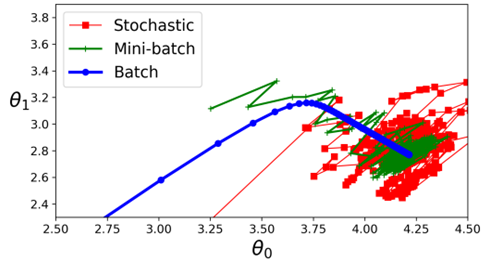

In [1]:
from IPython.display import Image
Image('figures/mini-batch.png', width=400)

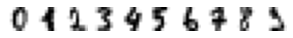

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
from sklearn import datasets

# Import data
digits = datasets.load_digits()
X = digits.data
t = digits.target

# Example data samples
plt.figure(figsize=(5,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(X[np.where(t==i)[0][1],:].reshape((8,8)), cmap='binary')
#     plt.title('Label '+str(i))
    plt.axis('off');

In [3]:
# Splitting into Training-Test Sets (80/20)
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, 
                                                    test_size=0.2, 
                                                    random_state=42)

# Scaling dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

0.08614293085620214
0.0545022689135166
0.10605615598096473
0.16693010487923293


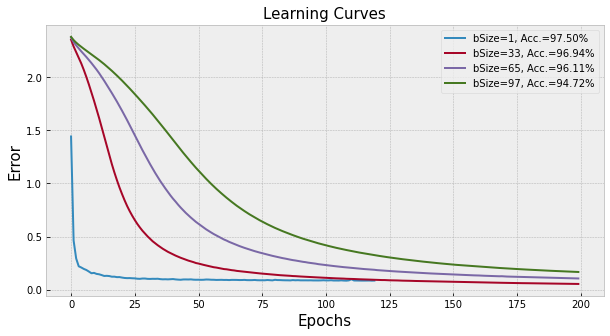

In [4]:
# MLP in scikit-learn
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(10,5))
acc = []
for batch_size in range(1,100,32):
    #architecture: 64-25-15-10
    mlp = MLPClassifier(hidden_layer_sizes=(25, 15), solver='sgd',
                      alpha=0.001, batch_size=batch_size,
                      learning_rate_init=0.01, random_state=10, 
                      momentum=0, nesterovs_momentum=False)

    mlp.fit(X_train, t_train)
    y_test = mlp.predict(X_test)
    acc.append(np.sum(y_test == t_test) / len(t_test) * 100)
    print(mlp.loss_curve_[-1])
    plt.plot(mlp.loss_curve_, label='bSize=%d, Acc.=%2.2f%%' % (batch_size, acc[-1]))

plt.xlabel('Epochs', size=15); plt.ylabel('Error', size=15)
plt.title('Learning Curves', size=15); plt.legend();

[A Neural Network Playground](https://playground.tensorflow.org/#activation=tanh&regularization=L2&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=10&networkShape=2&seed=0.66302&showTestData=false&discretize=false&percTrainData=80&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) is a great tool to provide visual interpretation of MLPs performance. You can choose and interpret the effect of the use of different features, architecture size, learning rate, among others.

---

## Post 2 & Post 6

*Steps to show the vanishing gradient problem and exploding gradient problem in ANNs?* - D. Upadhyay

*How does the exploding gradient problem come into play? An example showing the same.* - A. Kondaparthi

Let's consider the following network with 1 input layer, 1 hidden layer and 1 output layer, each layer with 2 neurons.

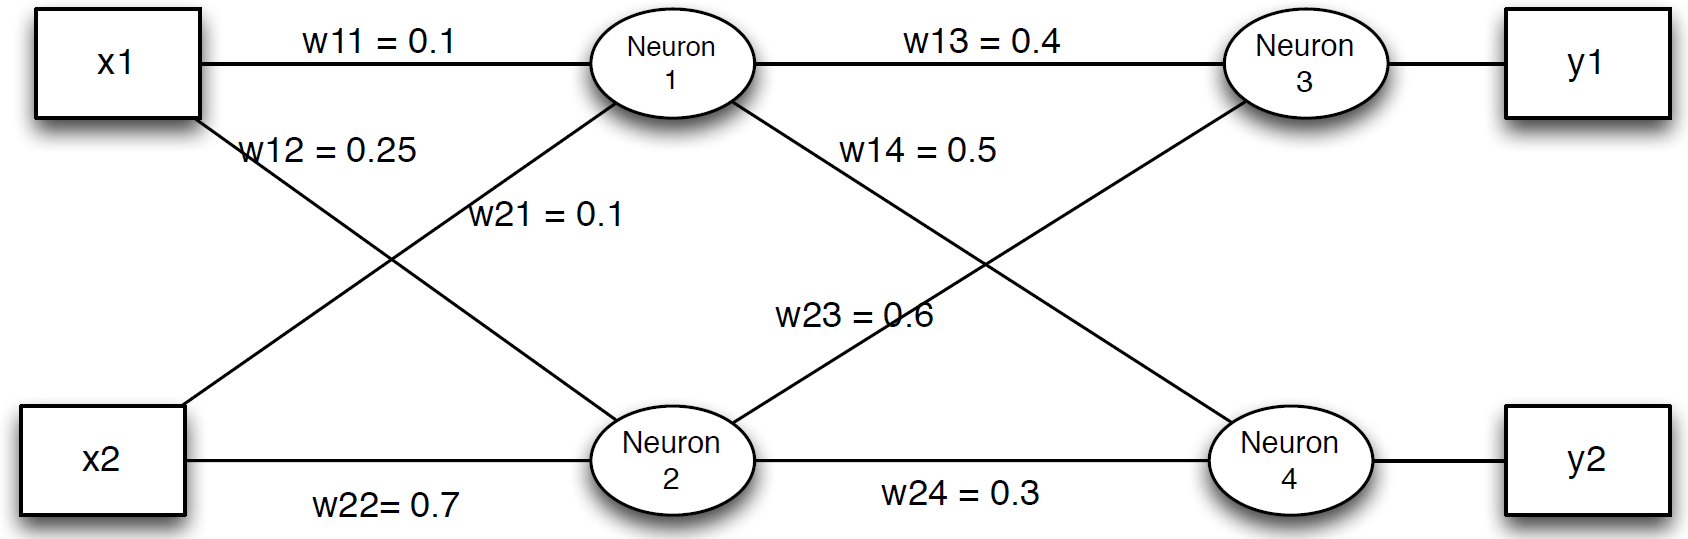

In [5]:
Image('figures/network.png', width=900)

All weights are initialized to the values shown (and there are no biases for simplicity). Consider the data point $x=[1,1]^T$ with desired output vector $d=[1,0]^T$. Complete one iteration of backpropagation by hand assuming a learning rate of $\eta=0.1$.

What would all the weight values be after one backpropagation iteration? Show your work.

Use the sigmoid activation function: $\phi(x) = \frac{1}{1 + e^{-x}}$. Note that $\frac{d\phi(x)}{dx}=\phi'(x) = \phi(x)(1-\phi(x))$.

Let's checkout the **network_solution.pdf**.

---

## Post 3

*Why making variances of the output of each layer equal to the variances of its inputs alleviates the vanishing/exploding gradient problem?* - J. Ma

Here is the paper from Glorot and Bengio with more information, experimental results and details: ["Understanding the difficulty of training deep feedforward neural networks"](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf).

Here's an analogy: if you set a microphone amplifier's knob too close to zero, people won't hear your voice, but if you set it too close to the max, your voice will be saturated and people won't understand what you are saying. Now imagine a chain of such amplifiers: they all need to be set properly in order for your voice to come out loud and clear at the end of the chain. Your voice has to come out of each amplifier at the same amplitude as it came in.

In [6]:
sigmoid = lambda x: 1/(1+np.exp(-x))

sigmoid_dev = lambda x: sigmoid(x)*(1 - sigmoid(x))

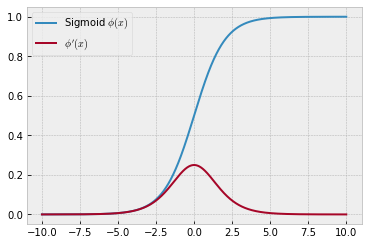

In [7]:
x = np.linspace(-10,10,10_000)

plt.plot(x, sigmoid(x), label='Sigmoid $\phi(x)$')
plt.plot(x, sigmoid_dev(x), label="$\phi'(x)$")
plt.legend();

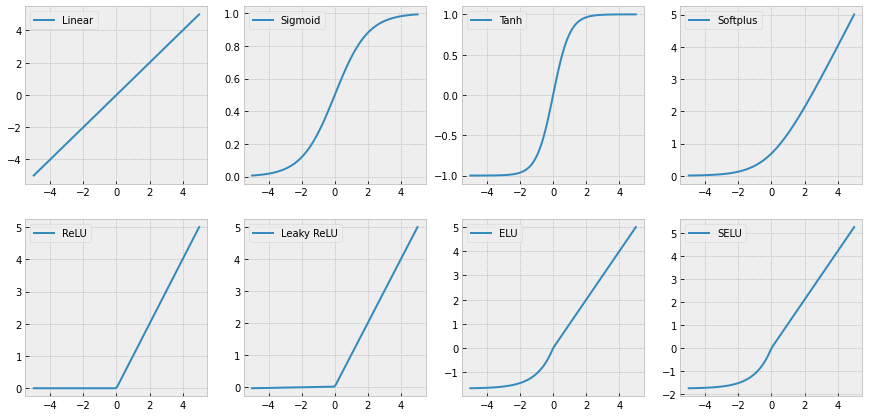

In [8]:
def activation_functions(x, alpha=1.67326, lam=1.0507):
    
    linear   = x
    sigmoid  = 1/(1+np.exp(-x))
    tanh     = (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
    softplus = np.log(1+np.exp(x))
    
    relu = x.copy()
    relu[x<=0] = 0
    
    leaky_relu = x.copy()
    leaky_relu[x<=0]=0.01*x[x<=0]
    
    elu = x.copy()
    elu[x<=0] = alpha*(np.exp(x[x<=0])-1)
    
    selu = 1.0507*x.copy()
    selu[x<=0] = lam*alpha*(np.exp(x[x<=0])-1)
        
    functions = np.vstack((linear, sigmoid, tanh, softplus, relu, leaky_relu, elu, selu)).T
    names = ['Linear', 'Sigmoid','Tanh','Softplus','ReLU','Leaky ReLU','ELU','SELU']
    
    return functions, names

x = np.linspace(-5,5,100)
functions, names = activation_functions(x)
plt.figure(figsize=(15,15))
for i in range(8):
    plt.subplot(4,4,i+1)
    plt.plot(x, functions[:,i], label=names[i])
    plt.legend();

---

## Post 4

*In FLDA, where K = the number of classes, why is the weight vector K-1 dimensions?* - A. Kondaparthi

The weight vector is normal to the hyperplane. It exists in the original feature space. Thus $\mathbf{w}$ is a $D$-dimensional vector.

But, since FLDA is supervised, we can only find up to $K-1$ hyperplanes.

---

## Post 5

*How do you train a model that is already trained with some training data with some new additional data without losing the previously trained weight values?* - A. Kondaparthi

This is common practice in transfer learning. We freeze pre-trained layers. This is not going to be included in the final exam.

You can find a code example in Lecture 26 Part 2 or during yesterday's Debriefing Monday.

---